In [1]:
import math

import numpy as np
from numpy.random import choice

import pandas as pd

from scipy.stats import gamma, expon, lognorm
import matplotlib.pyplot as plt

%matplotlib inline

#### Gamma Distribution: a candidate for the Brand Points Distribution
For more info on Exponential Distribution, check the wikipedia. https://en.wikipedia.org/wiki/Gamma_distribution

In [2]:
# Parameters of the Distribution
shape=2
scale = 5
loc = 0

mean, var, skew, kurt = gamma.stats(a=shape,scale=scale, moments='mvsk')
print('average value: {},\nvariance: {}'.format(mean, var))

average value: 10.0,
variance: 50.0


Brand Points Distribution Graph


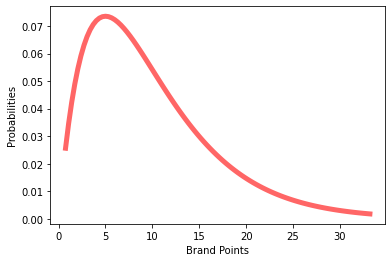

Average Brand Points: 10.0


In [3]:
# The graph of the pdf of the Gamma Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01, a=shape, loc=loc, scale=scale),
                gamma.ppf(0.99, a=shape, loc=loc, scale=scale), 100)
ax.plot(x, gamma.pdf(x, a=shape, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print('Brand Points Distribution Graph')
plt.xlabel('Brand Points')
plt.ylabel('Probabilities')
plt.show()
print('Average Brand Points: {}'.format(mean))

#### Log Normal Distribution: a candidate for the price premium rate
For more info on Exponential Distribution, check the wikipedia.

https://en.wikipedia.org/wiki/Log-normal_distribution

In [4]:
# Distribution Parameters
loc=0
mu = 0
sigma_squared = 1
scale = math.exp(mu)

mean, var, skew, kurt = lognorm.stats(s=sigma_squared, loc=loc, scale=scale, moments='mvsk')
print('average value: {},\nvariance: {}'.format(mean, var))

average value: 1.6487212707001282,
variance: 4.670774270471604


Price Premium Rate Distribution Graph


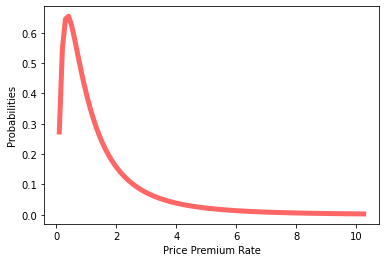

Average Premium Rate: 1.6487212707001282


In [5]:
# The graph of the pdf of the Exponential Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(lognorm.ppf(0.01, s=sigma_squared, loc=loc, scale=scale),
                lognorm.ppf(0.99, s=sigma_squared, loc=loc, scale=scale), 100)
ax.plot(x, lognorm.pdf(x, s=sigma_squared, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='expon pdf')
print('Price Premium Rate Distribution Graph')
plt.xlabel('Price Premium Rate')
plt.ylabel('Probabilities')
plt.show()
print('Average Premium Rate: {}'.format(mean))

In [6]:
mode = math.exp(mu-sigma_squared)
print('Peak of the above graph is {}.'.format(mode))

Peak of the above graph is 0.36787944117144233.


## Mature Community
- The community has matured enough that the Brand points are given by a **Gamma** distribution.
- And the price premium rates are given by an **exponential** distribution, independent of the Brand points.

| Input | Distribution |
| :-: | :-: |
| Brand Points | **Gamma Distribution** |
| Price Premium Rates | **Log Normal Distribution** |

The following are the experiments on a variety of ways that "Brand points" influence the likelihood.

#### Case Study: quadratic Brand Points
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^2 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [7]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

| Input | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Log Normal Distribution | mu = 0, sigma<sup>2</sup> = 1 |

In [8]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Log Normal Distribution
loc=0
mu = 0
sigma_squared = 1
scale = math.exp(mu)

In [53]:
# # Generate the Points for 5000 ticket holders
# Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# # Generating the price premium rate for 5000 ticket holders. independently of "points".
# Price_Premium_Rates = 0.2*lognorm.rvs(s=sigma_squared, loc=loc, scale=scale, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**4 * Price_Premium_Rates # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [54]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,1.967674,13.621706,2.376104e-03
premium_rate,0.325309,8.758831,5.217536e-03
likelihood,0.000200,0.048198,6.413218e-18


##### Selection of 100 tickets out of 5000

In [55]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

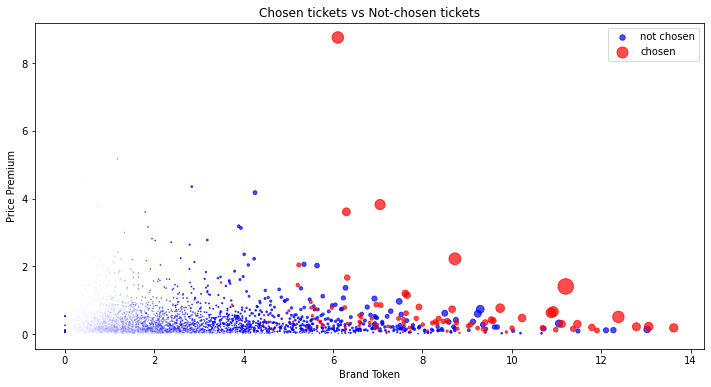

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Token')
ax.set_ylabel('Price Premium')
ax.legend()
plt.show()

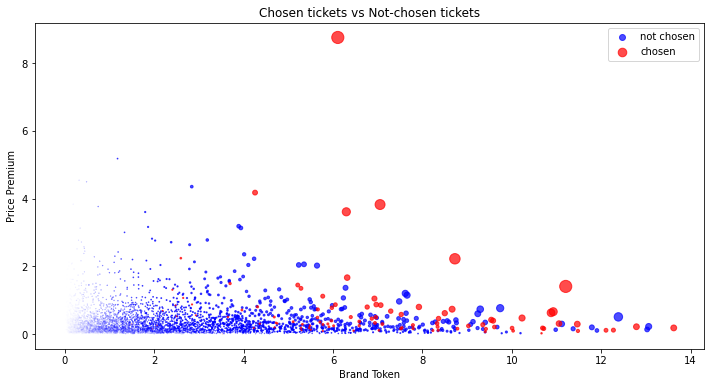

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Token')
ax.set_ylabel('Price Premium')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [47]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                    
                mean        max       min         mean       max       min
result                                                                    
chosen      5.160459  13.060860  1.046818     0.796158  8.758831  0.048211
not chosen  1.902515  13.621706  0.002376     0.315700  5.181979  0.005218

##### Point Distribution of 'chosen'

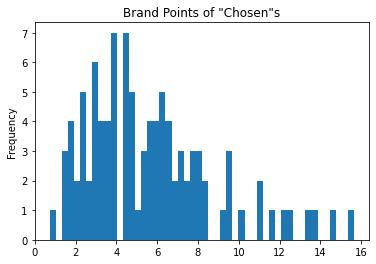

In [14]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

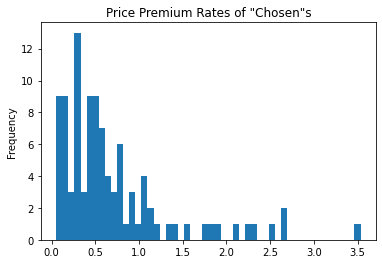

In [15]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [16]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

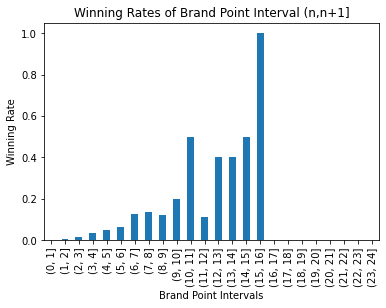

In [17]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [18]:
df_result_summary.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1977,1976,1,0.000506
"(1, 2]",1195,1187,8,0.006695
"(2, 3]",696,684,12,0.017241
"(3, 4]",464,447,17,0.036638
"(4, 5]",252,240,12,0.047619


#### Practical Cases: cubic
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^3 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [19]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Log Normal Distribution | mu = 0, sigma<sup>2</sup> = 1 |

In [20]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Log Normal Distribution
loc=0
mu = 0
sigma_squared = 1
scale = math.exp(mu)

In [21]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*lognorm.rvs(s=sigma_squared, loc=loc, scale=scale, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**3 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [22]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,1.972505,18.248851,8.188303e-06
premium_rate,0.327454,13.847457,7.481743e-03
likelihood,0.000200,0.023610,3.519861e-21


##### Selection of 100 tickets out of 5000

In [23]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

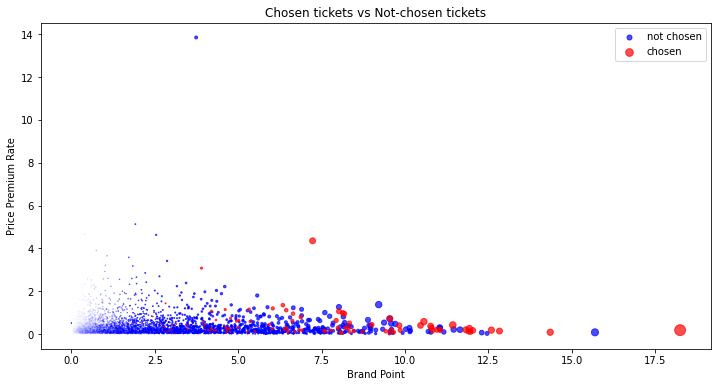

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [25]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                     
                mean        max       min         mean        max       min
result                                                                     
chosen      6.895544  18.248851  1.406314     0.445406   4.356451  0.023307
not chosen  1.872035  15.696713  0.000008     0.325046  13.847457  0.007482

##### Point Distribution of 'chosen'

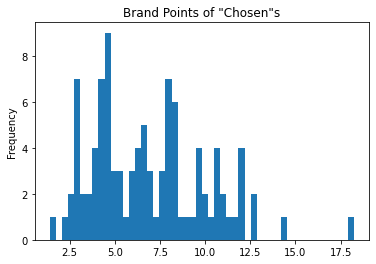

In [26]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

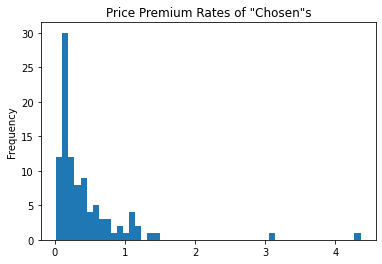

In [27]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [28]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

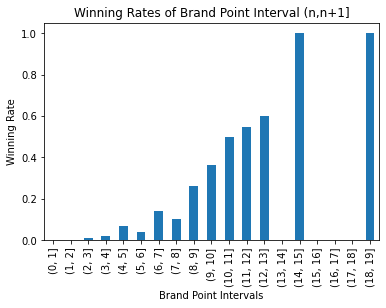

In [29]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [30]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",2033,2033,0,0.000000
"(1, 2]",1173,1172,1,0.000853
"(2, 3]",695,686,9,0.012950
"(3, 4]",414,406,8,0.019324
"(4, 5]",270,251,19,0.070370
"(5, 6]",158,152,6,0.037975
"(6, 7]",100,86,14,0.140000
"(7, 8]",58,52,6,0.103448
"(8, 9]",46,34,12,0.260870
"(9, 10]",22,14,8,0.363636


#### Practical Cases: exponential

$$
\mathrm{Likelihood Value} = \exp\big(Brand Points\big) \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [31]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Log Normal Distribution | mu = 0, sigma<sup>2</sup> = 1 |

In [32]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Log Normal Distribution
loc=0
mu = 0
sigma_squared = 1
scale = math.exp(mu)

In [33]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*lognorm.rvs(s=sigma_squared, loc=loc, scale=scale, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = np.exp(Points) * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [34]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.041666,17.788490,1.601026e-03
premium_rate,0.321912,5.806552,5.630467e-03
likelihood,0.000200,0.779470,3.152988e-09


##### Selection of 100 tickets out of 5000

In [35]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

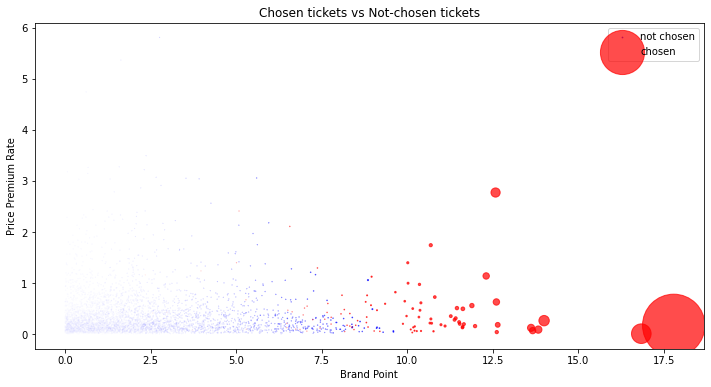

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [37]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                    
                mean        max       min         mean       max       min
result                                                                    
chosen      9.226814  17.788490  0.889814     0.453411  2.773023  0.011322
not chosen  1.895030   9.598697  0.001601     0.319228  5.806552  0.005630

##### Point Distribution of 'chosen'

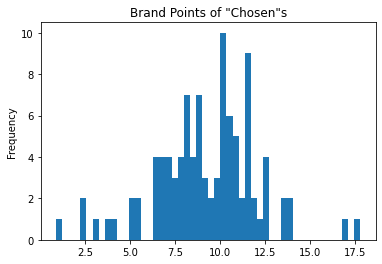

In [38]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

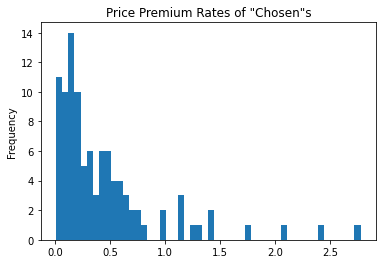

In [39]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [40]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

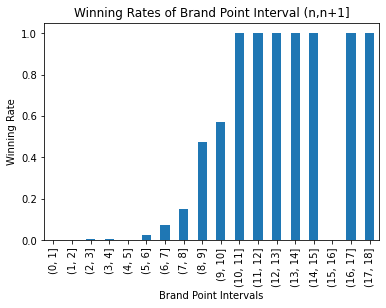

In [41]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [42]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1951,1950,1,0.000513
"(1, 2]",1159,1159,0,0.000000
"(2, 3]",776,773,3,0.003866
"(3, 4]",410,408,2,0.004878
"(4, 5]",251,251,0,0.000000
"(5, 6]",168,164,4,0.023810
"(6, 7]",121,112,9,0.074380
"(7, 8]",67,57,10,0.149254
"(8, 9]",38,20,18,0.473684
"(9, 10]",14,6,8,0.571429
